In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
import pydot
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn import preprocessing
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.metrics import mean_squared_error
from math import sqrt
from numpy.random import seed
from scipy import stats
import numpy as np
seed(1)

The random forest model is a type of additive model that makes predictions by combining decisions 
from a sequence of base models. More formally we can write this class of models as:
g(x)=f0(x)+f1(x)+f2(x)+...
where the final model g is the sum of simple base models fi.
Each fi goes from observations about an item (represented in the branches) 
to conclusions about the item's target value (represented in the leaves)

Scikit-Learn implements a set of sensible default hyperparameters for all models, 
but these are not guaranteed to be optimal for a problem.

In [3]:
features = pd.read_csv("clean_output.csv")
print(features.columns)
features = features.drop(['Unnamed: 0','log_p'], axis=1)
features = features.dropna()
features = features.astype({"waterfront": str, "grade": str, "condition":str, "yr_built":str})
print(features.columns)
print(features.shape)

Index(['Unnamed: 0', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'sqft_living15',
       'sqft_lot15', 'median_income_by_zip', 'mean_income_by_zip',
       'population_by_zip', 'people_employed_by_zip', 'people_educated_by_zip',
       'bachelor_degrees_by_zip', 'grad_degrees_by_zip', 'log_p'],
      dtype='object')
Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'sqft_living15', 'sqft_lot15',
       'median_income_by_zip', 'mean_income_by_zip', 'population_by_zip',
       'people_employed_by_zip', 'people_educated_by_zip',
       'bachelor_degrees_by_zip', 'grad_degrees_by_zip'],
      dtype='object')
(14916, 22)


In [4]:
features.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,sqft_above,sqft_basement,sqft_living15,sqft_lot15,median_income_by_zip,mean_income_by_zip,population_by_zip,people_employed_by_zip,people_educated_by_zip,bachelor_degrees_by_zip,grad_degrees_by_zip
count,1.491600e+04,14916.000000,14916.000000,14916.000000,14916.000000,14916.000000,14916.000000,14916.000000,14916.000000,14916.000000,14916.000000,14916.000000,14916.000000,14916.000000,14916.000000,14916.000000,14916.000000,14916.000000
mean,4.366647e+05,3.279029,1.986944,1845.033789,7211.126911,1.448243,0.146286,1589.795857,255.237932,1814.239676,7074.895615,78379.425918,99858.922365,31743.851904,16584.874028,22177.282784,6259.105457,3559.002682
std,1.851443e+05,0.773110,0.647147,630.454406,3375.474508,0.526409,0.581927,592.084313,383.367147,511.284366,2990.732848,21617.641725,26517.052517,9729.544508,5031.280336,6580.231681,2329.535930,1802.933892
min,1.140000e+05,2.000000,0.750000,560.000000,520.000000,1.000000,0.000000,480.000000,0.000000,620.000000,651.000000,42965.000000,54713.000000,4918.000000,2341.000000,3418.000000,595.000000,303.000000
25%,2.980000e+05,3.000000,1.500000,1370.000000,4944.750000,1.000000,0.000000,1150.000000,0.000000,1440.000000,5000.000000,60563.000000,79111.000000,23968.000000,12329.000000,17242.000000,4197.000000,1913.000000
50%,3.999500e+05,3.000000,2.000000,1770.000000,7200.000000,1.000000,0.000000,1440.000000,0.000000,1730.000000,7249.000000,75839.000000,95411.000000,32569.000000,16520.000000,22247.000000,6235.000000,3142.000000
75%,5.400000e+05,4.000000,2.500000,2250.000000,9120.000000,2.000000,0.000000,1920.000000,500.000000,2131.500000,8816.250000,92316.000000,113787.000000,37519.000000,20347.000000,26215.000000,7943.000000,4848.000000
max,1.127000e+06,5.000000,3.500000,4170.000000,19141.000000,3.500000,4.000000,3740.000000,2000.000000,3640.000000,17550.000000,145262.000000,179981.000000,50065.000000,25296.000000,34944.000000,10665.000000,7517.000000


In [5]:
numeric_value = features.dtypes[features.dtypes != 'object'].index
skewed_features = features[numeric_value].apply(lambda x: stats.skew(x.dropna())).sort_values(ascending=False)
skewness=pd.DataFrame({'Skewed Features':skewed_features})
skewness = skewness[abs(skewness)>0.85]
print("There are {} skewed numerical features to log transform".format(skewness.shape[0]))
skewed_features = skewness.index
features[skewed_features] = np.log1p(features[skewed_features])
features.head(5)



#X_scaled = X_std * (max - min) + min
#value_list = list(features.columns.values)
#min_max_scaler = preprocessing.MinMaxScaler()
#for each in value_list:
#    x = features[[each]].values.astype(float)
#    #x_scaled = min_max_scaler.fit_transform(x)
#    features[[each]] = x_scaled
#print(features.head(10))

There are 18 skewed numerical features to log transform


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,sqft_living15,sqft_lot15,median_income_by_zip,mean_income_by_zip,population_by_zip,people_employed_by_zip,people_educated_by_zip,bachelor_degrees_by_zip,grad_degrees_by_zip
0,12.309987,1.386294,0.693147,7.074117,8.639588,0.693147,0,0.0,3,7,...,1955,7.201171,8.639588,11.016003,11.223001,10.141086,9.400299,9.755162,8.043663,7.223296
1,13.195616,1.386294,1.178655,7.852050,8.887791,1.098612,0,0.0,3,7,...,1951,7.433075,8.941153,10.907093,11.255255,10.577834,9.958023,10.252947,9.079092,8.706325
2,12.100718,1.098612,0.693147,6.647688,9.210440,0.693147,0,0.0,3,6,...,1933,7.908755,8.995041,11.414088,11.572900,9.979012,9.285819,9.608647,8.477828,7.911324
3,13.311331,1.609438,1.386294,7.581210,8.517393,0.693147,0,0.0,5,7,...,1965,7.215975,8.517393,11.414496,11.580145,9.643161,9.115700,9.394826,8.409162,7.785305
4,13.142168,1.386294,1.098612,7.427144,8.997271,0.693147,0,0.0,3,8,...,1987,7.496097,8.923191,11.886301,12.063160,10.186069,9.435801,9.739791,8.937087,8.514389


In [6]:
features = pd.get_dummies(features)

In [7]:
# Labels are the values we want to predict
labels = np.array(features['price'])
features= features.drop('price', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [8]:
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42,shuffle = True)

In [9]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)


Training Features Shape: (11187, 143)
Training Labels Shape: (11187,)
Testing Features Shape: (3729, 143)
Testing Labels Shape: (3729,)


In [10]:
print(train_features)
print(train_labels)
print(test_features)
print(test_labels)

[[1.38629436 1.01160091 6.91869522 ... 0.         0.         0.        ]
 [1.09861229 0.69314718 7.03085748 ... 0.         0.         0.        ]
 [1.38629436 0.69314718 7.24494155 ... 0.         0.         0.        ]
 ...
 [1.60943791 1.25276297 8.05547514 ... 0.         1.         0.        ]
 [1.60943791 1.38629436 7.93773178 ... 0.         0.         0.        ]
 [1.09861229 1.178655   7.16317239 ... 0.         0.         0.        ]]
[12.66033109 13.3558548  12.54254845 ... 13.27101784 13.03244086
 13.12236538]
[[1.38629436 0.91629073 7.4905294  ... 0.         0.         0.        ]
 [1.38629436 1.25276297 7.25205395 ... 0.         0.         0.        ]
 [1.38629436 1.25276297 7.36581284 ... 0.         0.         0.        ]
 ...
 [1.38629436 0.91629073 7.31388683 ... 0.         0.         0.        ]
 [1.09861229 1.01160091 7.18235211 ... 0.         0.         0.        ]
 [1.38629436 1.01160091 7.4905294  ... 0.         0.         0.        ]]
[13.20670636 13.18063417 12.69158

In [13]:
#we need to establish a baseline, a sensible measure that we hope to beat with our model
#If you are working on a regression problem, you can use a central tendency measure as the result for all predictions
#such as the mean or the median.????
baseline_preds= np.mean(test_labels) 
baseline_preds = np.full((len(test_labels),1), baseline_preds)
rms = sqrt(mean_squared_error(test_labels, baseline_preds))
print('Root Mean Suqare Error:', round(np.mean(rms), 4))

#baseline_errors = abs(baseline_preds - test_labels)
#print('Average baseline error: ', round(np.mean(baseline_errors), 2))
#Average baseline error:  0.22

Root Mean Suqare Error: 0.4145


In [12]:
#####################without FOLD#########################
# Instantiate model with 1000 decision trees
base_model = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
base_model.fit(train_features, train_labels)
predictions = base_model.predict(test_features)
rms = sqrt(mean_squared_error(test_labels, predictions))
print('Root Mean Suqare Error:', round(np.mean(rms), 4))

KeyboardInterrupt: 

As an example, consider fitting a model with K = 5. 
The first iteration we train on the first four folds and evaluate on the fifth. 
The second time we train on the first, second, third, and fifth fold and 
evaluate on the fourth. We repeat this procedure 3 more times, 
each time evaluating on a different fold.
At the very end of training, we average the performance on each of the folds 
to come up with final validation metrics for the model.
1. n_estimators = number of trees in the foreset
2. max_features = max number of features considered for splitting a node
3. max_depth = max number of levels in each decision tree
4. min_samples_split = min number of data points placed in a node before the node is split
5. min_samples_leaf = min number of data points allowed in a leaf node
6. bootstrap = method for sampling data points (with or without replacement)

In [11]:
##########################Cross validation################################
#Random Hyperparameter Grid
##########################################################################
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [12]:
##########################Cross validation################################
#In contrast to GridSearchCV, not all parameter values are tried out, but 
#rather a fixed number of parameter settings is sampled from the specified distributions.
#The parameters of the estimator used to apply these methods 
#are optimized by cross-validated search over parameter settings.
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(train_features, train_labels)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   56.2s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 43.1min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [16]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 100,
 'bootstrap': False}

In [17]:
best_random = rf_random.best_estimator_
predictions = best_random.predict(test_features)
rms = sqrt(mean_squared_error(test_labels, predictions))
print('Root Mean Suqare Error:', round(np.mean(rms), 4))

Root Mean Suqare Error: 0.1625


In [18]:
# Create the parameter grid based on the results of random search 
# Exhaustive search over specified parameter values for an estimator.
param_grid = {
    'bootstrap': [False],
    'max_depth': [60, 70, 80, 90],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [4, 5, 6, 7],
    'n_estimators': [800, 1200, 1400, 1600, 1800]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [19]:
# Fit the grid search to the data
grid_search.fit(train_features, train_labels)
grid_search.best_params_

Fitting 3 folds for each of 160 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed: 25.5min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 34.6min finished


{'bootstrap': False,
 'max_depth': 70,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 7,
 'n_estimators': 1800}

In [22]:

best_grid = grid_search.best_estimator_
predictions = best_grid.predict(test_features)
rms = sqrt(mean_squared_error(test_labels, predictions))
print('Root Mean Suqare Error:', round(np.mean(rms), 4))

Root Mean Suqare Error: 0.1621


In [21]:
# Pull out one tree from the forest
tree = best_grid.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph,) = pydot.graph_from_dot_file('tree.dot')

In [22]:
# Write graph to a png file
graph.write_png('tree.png')

In [23]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

In [23]:
# Get numerical feature importances
importances = list(best_grid.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: grad_degrees_by_zip  Importance: 0.14
Variable: mean_income_by_zip   Importance: 0.1
Variable: bachelor_degrees_by_zip Importance: 0.09
Variable: sqft_living          Importance: 0.08
Variable: median_income_by_zip Importance: 0.07
Variable: sqft_living15        Importance: 0.06
Variable: population_by_zip    Importance: 0.05
Variable: people_educated_by_zip Importance: 0.05
Variable: sqft_above           Importance: 0.04
Variable: people_employed_by_zip Importance: 0.04
Variable: bathrooms            Importance: 0.03
Variable: sqft_lot15           Importance: 0.03
Variable: grade_9              Importance: 0.03
Variable: sqft_lot             Importance: 0.02
Variable: view                 Importance: 0.02
Variable: sqft_basement        Importance: 0.02
Variable: grade_6              Importance: 0.02
Variable: grade_7              Importance: 0.02
Variable: grade_8              Importance: 0.02
Variable: bedrooms             Importance: 0.01
Variable: floors               Imp

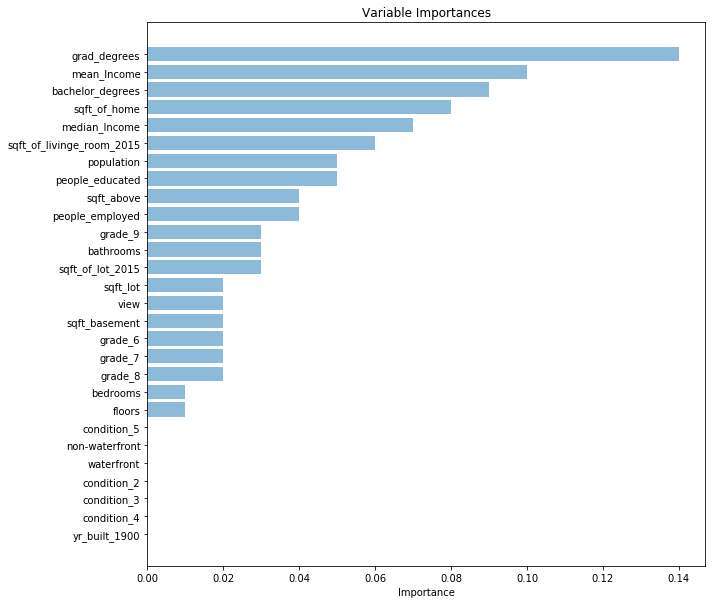

In [24]:

df = pd.DataFrame(feature_importances)
df = df.rename(columns = {0:"Variable", 1:"Importance"})
plt.figure(figsize=(10,10))
df = df.head(28)

def translateContinent(number):
    result = {
        "grad_degrees_by_zip": "grad_degrees",
        "mean_income_by_zip": "mean_Income",
        "bachelor_degrees_by_zip": "bachelor_degrees",
        "sqft_living":"sqft_of_home",
        "median_income_by_zip": "median_Income",
        "sqft_living15":"sqft_of_livinge_room_2015",
        "population_by_zip":"population",
        "people_educated_by_zip":"people_educated",
        "sqft_above":"sqft_above",
        "people_employed_by_zip": "people_employed",
        "sqft_lot15": "sqft_of_lot_2015",
        "grade_9": "grade_9",
        "sqft_lot":"sqft_lot",
        "sqft_basement":"sqft_basement",
        "grade_6":"grade_6",
        "grade_7":"grade_7",
        "grade_8":"grade_8",
        "waterfront_0":"non-waterfront",
        "waterfront_1":"waterfront",
        "condition_2": "condition_2",
        "condition_3": "condition_3",
        "condition_4": "condition_4",
        "condition_5": "condition_5",
        "yr_built_1900": "yr_built_1900",
        "bathrooms":"bathrooms",
        "bedrooms":"bedrooms",
        "floors":"floors",
        "view": "view"
    }
    return result.get(number,"--> not found")
df['Variable'] = df['Variable'].apply(translateContinent)

df = df.sort_values(by=['Importance'], ascending=[True])
plt.barh(df['Variable'], df['Importance'],  align='center', alpha=0.5)
plt.title('Variable Importances')
plt.xlabel("Importance")
plt.show()